<h1 style = "font-family: Serif; font-size:55px; font-style: normal; letter-spacing: 3px; background-color: #f6f5f5; color :#0D0D0F; border-radius: 100px 100px; text-align: center;"> END-TO-END STROKE CLASSIFICATION </h1>

<h1 style = "font-family: Serif; font-size: 40px; font-style: normal; letter-spacing: 3px; background-color: #f6f5f5; color :#0D0D0F; border-radius: 100px 100px; text-align: center;"> TABLE OF CONTENTS </h1>


* [1. Introduction](#1)
    * [1.1 Libraries](#1.1)
    * [1.2 Attribute Information](#1.2)
* [2. Data Preparation & Exploratory Data Analysis (EDA)](#2)
    * [2.1 Data Preprocessing - Null Values, Simple Statistics & Information About Our Dataset](#2.1)
    * [2.2 Data Visualization & Data Analysis - Continuous & Categorical Features](#2.2)
    * [2.3 Label Encoding](#2.3)
* [3. Modelling](#3)
    * [3.1 Initializattion](#3.1)
    * [3.2 Logistic Regression](#3.2)
    * [3.3 SVC](#3.3)
    * [3.4 K Neighbors Classifier](#3.4)
    * [3.5 Decision Tree Classifier](#3.5)
    * [3.6 Random Forest Classifier](#3.6)
    * [3.7 AdaBoost Classifier](#3.7)
    * [3.8 Gradient Boosting Classifier](#3.8)
    * [3.9 XGBoost Classifier](#3.9)
* [4. Conclusion](#4)
    * [4.1 Comparing Models](#4.1)
    * [4.2 Summary](#4.2)

<a id = '1'></a>

<h2 style = "font-family: Serif; font-size: 50px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 1. INTRODUCTION </h2>

According to the [World Health Organization (WHO)](https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death#:~:text=Leading%20causes%20of%20death%20in,9.1%20million%20deaths%20in%202021.), stroke is the 3rd leading cause of death globally in 2021, responsible for approximately 10% of total deaths. 

According to an ASA [news release](https://newsroom.heart.org/news/new-guideline-preventing-a-first-stroke-may-be-possible-with-screening-lifestyle-changes), up to 80% of strokes may be preventable through diet and lifestyle changes and other modifications. Hence, it is very important to be able to predict whether a patient is likely to get stroke based on different input parameters as early as possible.

In this notebook, we will visualize some key indicators that lead to heart strokes and build predictive models. The dataset we will be using can be found on [kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data). The dataset is sampled from a wide range of age groups, gender, habits and health related issues. See [Attribute Information](#1.1) for detailed features.

<h3 style = "font-family: Serif; font-size: 30px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> PROBLEM STATEMENT </h3>

> We aim to visualize the relationships between various habits/factors and strokes & predict stroke events with the best model and hyper-tuned parameters.

<a id = 'Questions'></a>

<h3 style = "font-family: Serif; font-size: 30px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> QUESTIONS & ASSUMPTIONS </h3>

* Questions
1. Does age have an impact on strokes?
2. Does body mass index have an impact on strokes?
3. Does glucose level have an impact on strokes?

* Assumptions
1. Males are more susceptible to strokes: is this true?
2. Patients with hypertension have a higher risk of getting a stroke: is this true?
3. Patients with a heart disease are prone to strokes: is this true?
4. High workload results in high blood pressure and that could lead to stroke: is this true?
5. Smoking can induce strokes: is this true?


<h3 style = "font-family: Serif; font-size: 30px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> ADDITIONAL READING </h3>

All the assumptions are made from following articles, and we are trying to address these points with the dataset in this notebook:

* [Is It a Stroke or a Heart Attack?](https://www.healthline.com/health/stroke-vs-heart-attack)
* [What Is a Stroke?](https://www.webmd.com/heart-disease/stroke)
* [What is stroke?](https://www.heartandstroke.ca/stroke/what-is-stroke)
* [Stroke after a heart attack: What’s the risk?](https://www.health.harvard.edu/heart-health/stroke-after-a-heart-attack-whats-the-risk)

<a id = '1.1'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 1.1 LIBRARIES </h2>

In [1]:
%matplotlib inline

# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

# Seaborn configurations
sns.set_style('darkgrid')

# Ignore warnings
warnings.filterwarnings('ignore')

# Import some preprocessing & model_selection modules
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Import SMOTE to deal with imbalanced dataset
from imblearn.over_sampling import SMOTE

# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Import evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

<a id = '1.2'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 1.2 ATTRIBUTE INFORMATION </h2>

1) **id**: Identification number of the patient.
2) **gender**: "Male", "Female" or "Other".
3) **age**: Age of the patient.
4) **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
5) **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
6) **ever_married**: "No" or "Yes".
7) **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed".
8) **Residence_type**: "Rural" or "Urban".
9) **avg_glucose_level**: Average glucose level in blood for the patient.
10) **bmi**: Body mass index of the patient.
11) **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*.
12) **stroke**: Our target, 0 if the patient did not have a stroke, 1 if the patient had a stroke.

*Note*: "Unknown" in smoking_status means that the information is unavailable for this patient.

<a id = '2'></a>

<h2 style = "font-family: Serif; font-size: 50px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 2. DATA PREPARATION & EXPLORATORY DATA ANALYSIS (EDA) </h2>

<a id = '2.1'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 2.1 DATA PREPROCESSING </h2>

In [2]:
# import stroke dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head().T

,0,1,2,3,4
id,9046,51676,31112,60182,1665
gender,Male,Female,Male,Female,Female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,NaN,32.5,34.4,24.0


In [3]:
# drop the id column since it does not provide any useful information
df = df.drop(columns="id")

<h3 style = "font-family: Serif; font-size: 30px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> STATISTICS OF OUR DATA </h3>

In [4]:
# Statistics of numerical data
round(df.describe(exclude = 'object'), 2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,43.23,0.1,0.05,106.15,28.89,0.05
std,22.61,0.3,0.23,45.28,7.85,0.22
min,0.08,0.0,0.00,55.12,10.30,0.00
25%,25.00,0.0,0.00,77.24,23.50,0.00
50%,45.00,0.0,0.00,91.88,28.10,0.00
75%,61.00,0.0,0.00,114.09,33.10,0.00
max,82.00,1.0,1.00,271.74,97.60,1.00


In [5]:
# Statistics of categorical data
round(df.describe(exclude = ['float64', 'int64']), 2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


<h3 style = "font-family: Serif; font-size: 30px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> CHECK FOR NULL VALUES </h3>

In [6]:
# check the information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
# check is there are null values in our dataset
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<h3 style = "font-family: Serif; font-size: 30px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> WHAT CAN WE SAY ABOUT OUR DATASET? </h3>

1. There are some missing data for the **bmi** feature, so we are going to replace it with the median.
2. We have both categorical and numerical features:
    - **Categorical Features**: gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status, stroke.
    - **Numerical Features (Continous)**: age, avg_glucose_level, bmi.

In [8]:
# replace the null values with median for the bmi column
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

In [9]:
# check is there are still null values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
# Define our categorical and numerical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                       'work_type', 'Residence_type', 'smoking_status', 'stroke']
numerical_features = ['age', 'bmi', 'avg_glucose_level']

<a id = '2.2'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 2.2 DATA VISUALIZATION & DATA ANALYSIS</h2>

Different types of visualizations are required for numerical (continuous) and categorical features. In particular, we can analyse the distributions of continuous features (**age**, **bmi**, and **avg_glucose_level**). On the other hand, we can analyse categorical features (**gender**, **hypertension**, **heart_disease**, **ever_married**, **work_type**, **Residence_type**, **smoking_status**, **stroke**) by observing their bar plots.

<h3 style = "font-family: Serif; font-size: 30px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> NUMERICAL FEATURES (CONTINUOUS) </h3>

We will now create some visualizations to answer our questions from [Questions & Assumptions](#Questions).

**Question 1.** Does age have impact on strokes?

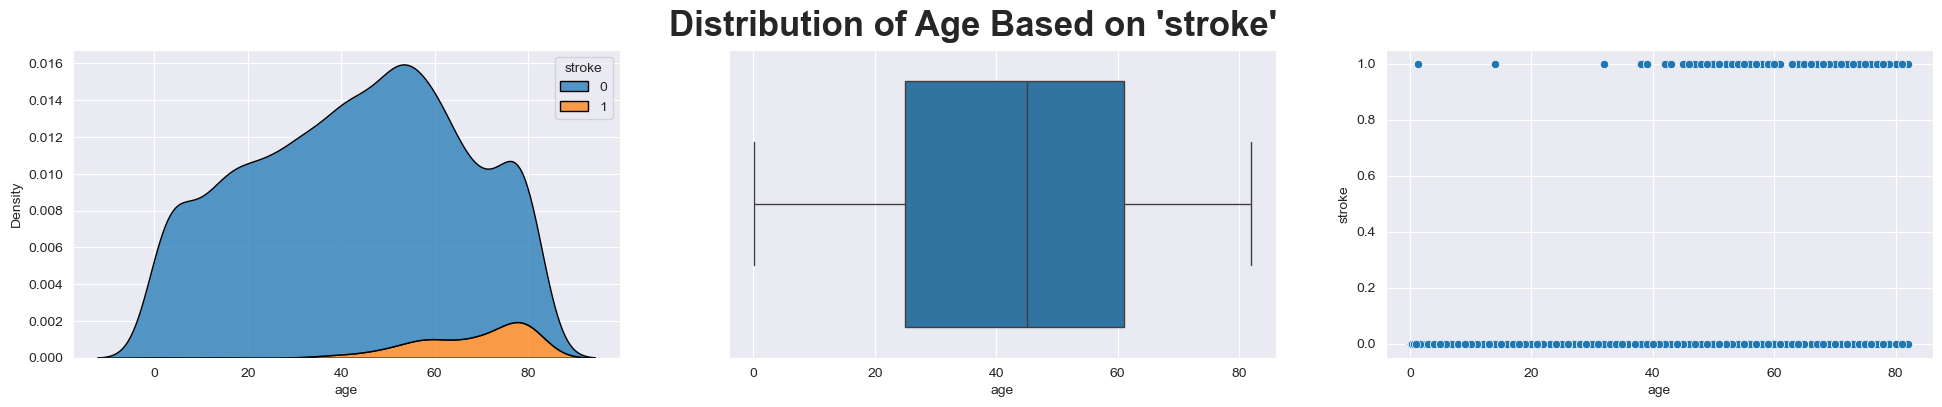

In [11]:
# Visualization of the continuous features in different types of plots

# Visualization of 'age' in different types of plots
fig, ax = plt.subplots(1, 3, figsize=(24, 4))
plt.subplots_adjust(hspace = 0.5)
fig.suptitle("Distribution of Age Based on 'stroke'", fontsize=25, fontweight='heavy')
sns.kdeplot(x=numerical_features[0], hue='stroke', edgecolor='black', data=df, multiple='stack', ax=ax[0])
sns.boxplot(x=numerical_features[0], data=df, ax=ax[1])
sns.scatterplot(x=numerical_features[0], y='stroke', data=df, ax=ax[2])

plt.savefig('dist-age-stroke.png')
plt.show()

**Note (to Question 1):** We can (commonly) classify age ranges into the following groups:

|  Group     | Age |
| ----------- | ----------- |
| Child | 0 - 11 years old |
| Adolescence | 12 - 19 years old |
| Adult | 20 - 39 years old |
| Middle Age Adult | 40 - 59 years old |
| Senior Adult | 60 years and older |

**Answer (to Question 1):** Based on the plots above, we can see that age **has significant impact** on strokes. In particular, stroke events happened most often in the group of middle age adult and senior adult.

<br> <br> <br> <br> <br>

**Question 2.** Does body mass index have an impact on strokes?

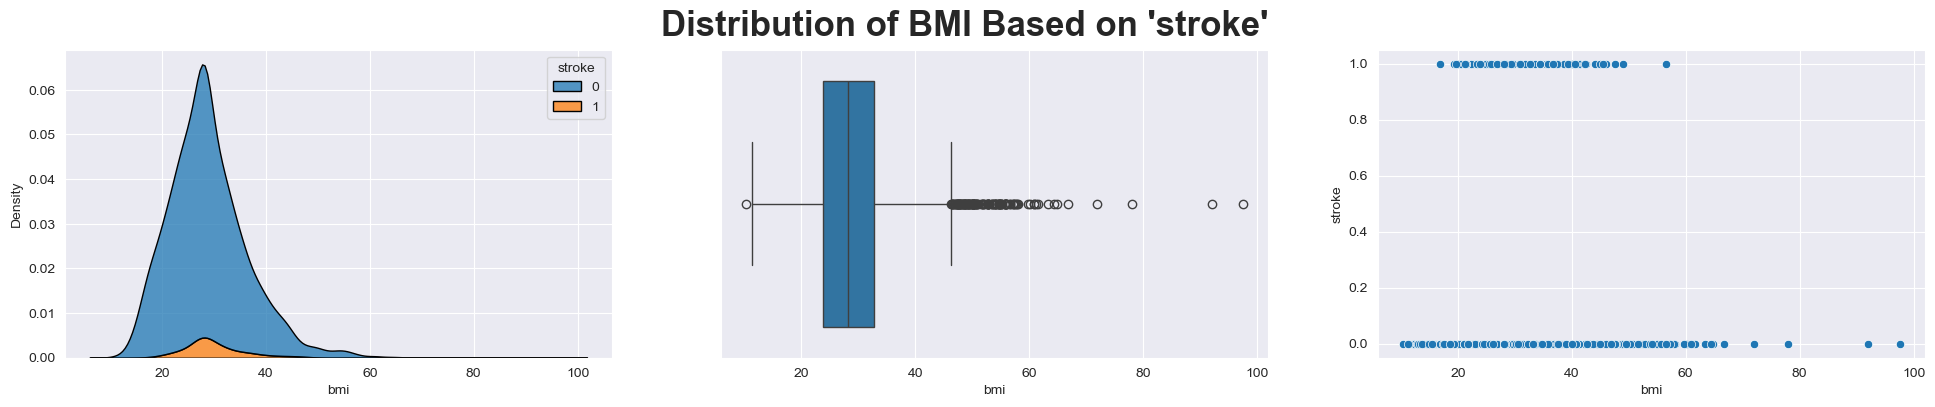

In [12]:
# Visualization of 'bmi' in different types of plots
fig, ax = plt.subplots(1, 3, figsize=(24, 4))
plt.subplots_adjust(hspace = 0.5)
fig.suptitle("Distribution of BMI Based on 'stroke'", fontsize=25, fontweight='heavy')
sns.kdeplot(x=numerical_features[1], hue='stroke', edgecolor='black', data=df, multiple='stack', ax=ax[0])
sns.boxplot(x=numerical_features[1], data=df, ax=ax[1])
sns.scatterplot(x=numerical_features[1], y='stroke', data=df, ax=ax[2])

plt.savefig('dist-bmi-stroke.png')
plt.show()

**Note (to Question 2):** We can (commonly) classify bmi into the following groups:

|  Group     | BMI |
| ----------- | ----------- |
| Underweight | 0 - 18.4 |
| Ideal | 18.5 - 24.9 |
| Overweight | 25 - 29.9 |
| Obesity | 30 and higher |

**Answer (to Question 2):** Based on the plots above, we can see that bmi **has impact** on strokes. In particular, stroke events happened most often in the group of overweight and obese patient. 

<br> <br> <br> <br> <br>

**Question 3.** Does glucose level have an impact on strokes?

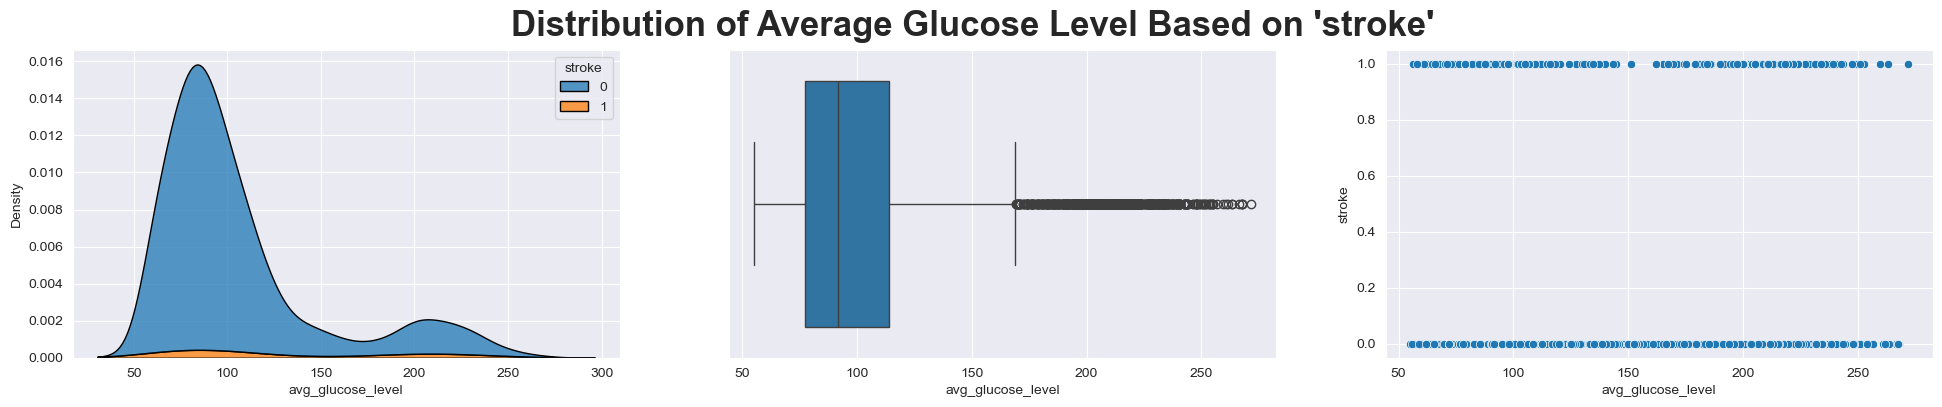

In [13]:
# Visualization of 'avg_glucose_level' in different types of plots
fig, ax = plt.subplots(1, 3, figsize=(24, 4))
plt.subplots_adjust(hspace = 0.5)
fig.suptitle("Distribution of Average Glucose Level Based on 'stroke'", fontsize=25, fontweight='heavy')
sns.kdeplot(x=numerical_features[2], hue='stroke', edgecolor='black', data=df, multiple='stack', ax=ax[0])
sns.boxplot(x=numerical_features[2], data=df, ax=ax[1])
sns.scatterplot(x=numerical_features[2], y='stroke', data=df, ax=ax[2])

plt.savefig('dist-glucose-stroke.png')
plt.show()

**Note (to Question 3):** We can (commonly) classify average glucose level into the following groups:

|  Group     | Average Glucose Level |
| ----------- | ----------- |
| Low | 0 - 89.9 |
| Normal | 90 - 159.9 |
| High | 160 - 229.9 |
| Very High | 230 and higher |

**Answer (to Question 3):** Based on the plots above, we can see that average glucose level **does not have significant impact** on strokes. In partiicular, it is unclear which groups have the most stroke events.

<br> <br> <br> <br> <br>

**Summary:** 

Patients who had a stroke are in the following range (based on numerical features):
   * **age** in between 40 and 85.
   * **bmi** in between 20 to 40.
   * **avg_glucose_level** is quite vague (i.e. unclear what range havs the most stroke events).

<h3 style = "font-family: Serif; font-size: 30px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> CATEGORICAL FEATURES </h3>

We will now create some visualizations to verify if our assumptions from [Questions & Assumptions](#Questions) are true.

**Assumption 1.** Males are more susceptible to strokes: is this true?

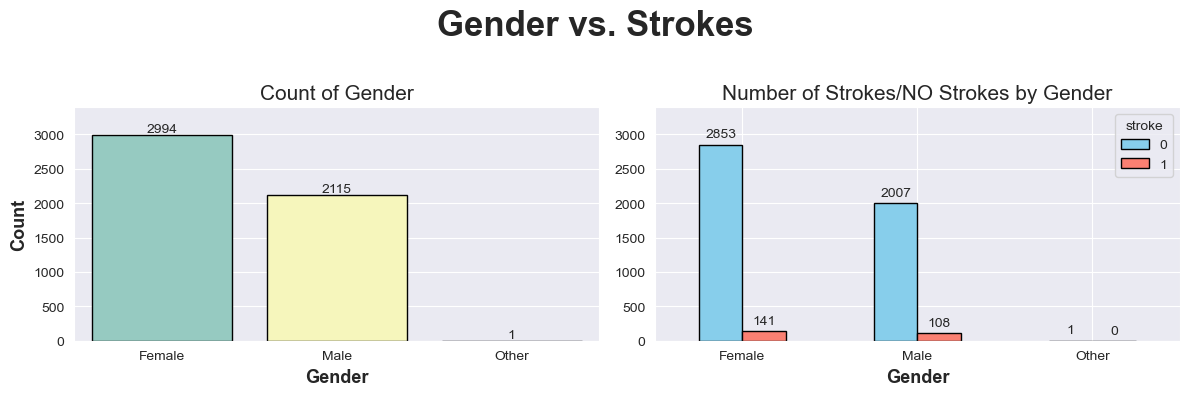

In [14]:
# Visualization of the categorical features in bar plots

# Visualization of 'gender' in bar plots
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Gender vs. Strokes', fontsize=25, fontweight='bold')

# First subplot: Countplot of gender
sns.countplot(x=categorical_features[0], edgecolor='black', palette="Set3", data=df, ax=axes[0], order=['Female', 'Male', 'Other'])
axes[0].set_title("Count of Gender", fontsize=15)
axes[0].set_xlabel("Gender", fontsize=13, fontweight='bold')
axes[0].set_ylabel("Count", fontsize=13, fontweight='bold')

# Adding counts above each bar for countplot
for container in axes[0].containers:
    axes[0].bar_label(container)

# Second subplot: Bar plot for stroke counts by gender
# Group data by gender and stroke status, and count occurrences
stroke_counts = df.groupby(['gender', 'stroke']).size().unstack(fill_value=0)

# Bar plot for stroke counts by gender on the second subplot
stroke_counts.plot(kind='bar', stacked=False, edgecolor='black', color=['skyblue', 'salmon'], ax=axes[1])
axes[1].set_title("Number of Strokes/NO Strokes by Gender", fontsize=15)
axes[1].set_xlabel("Gender", fontsize=13, fontweight='bold')
axes[1].legend(['0', '1'], title='stroke')

# Change x-axis labels to 'Female' and 'Male' with horizontal rotation
axes[1].set_xticklabels(['Female', 'Male', 'Other'], rotation=0)

# Adding counts above each bar for stroke_counts plot
for container in axes[1].containers:
    axes[1].bar_label(container, label_type='edge', padding=3)

# Synchronize y-axis limits
max_count = max(axes[0].get_ylim()[1] + 250, axes[1].get_ylim()[1] + 250)
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)

# Display the combined plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title

plt.savefig('bar-gender-stroke.png')
plt.show()

**Notes (to Assumption 1):** 

* Roughly **60%** of patients are **females**, and roughly **40%** of patients are **males**.
* Among **females**, roughly **4.7%** of them had a stroke.
* Among **males**, roughly **5.1%** of them had a stroke.

**Verification (to Assumption 1):** Risk of stroke events in both males and females are the same, which proves that our assumption is **false**.

<br> <br> <br> <br> <br>

**Assumption 2.** Patients with hypertension have a higher risk of getting a stroke: is this true?

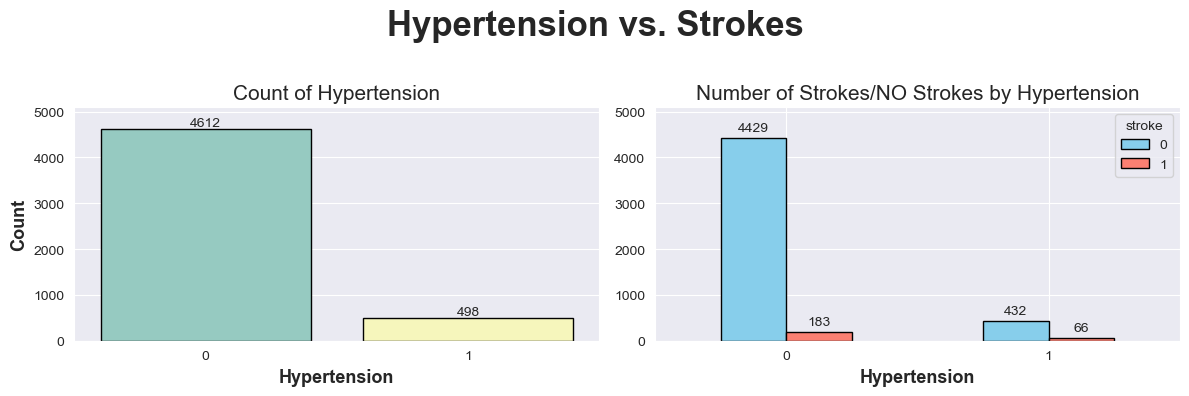

In [15]:
# Visualization of 'hypertension' in bar plots
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Hypertension vs. Strokes', fontsize=25, fontweight='bold')

# First subplot: Countplot of hypertension
sns.countplot(x=categorical_features[1], edgecolor='black', palette="Set3", data=df, ax=axes[0])
axes[0].set_title("Count of Hypertension", fontsize=15)
axes[0].set_xlabel("Hypertension", fontsize=13, fontweight='bold')
axes[0].set_ylabel("Count", fontsize=13, fontweight='bold')

# Adding counts above each bar for countplot
for container in axes[0].containers:
    axes[0].bar_label(container)

# Second subplot: Bar plot for stroke counts by hypertension
# Group data by hypertension and stroke status, and count occurrences
stroke_counts = df.groupby(['hypertension', 'stroke']).size().unstack(fill_value=0)

# Bar plot for stroke counts by hypertension on the second subplot
stroke_counts.plot(kind='bar', stacked=False, edgecolor='black', color=['skyblue', 'salmon'], ax=axes[1])
axes[1].set_title("Number of Strokes/NO Strokes by Hypertension", fontsize=15)
axes[1].set_xlabel("Hypertension", fontsize=13, fontweight='bold')
axes[1].legend(['0', '1'], title='stroke')

# Change x-axis labels to '0' and '1' with horizontal rotation
axes[1].set_xticklabels(['0', '1'], rotation=0)

# Adding counts above each bar for stroke_counts plot
for container in axes[1].containers:
    axes[1].bar_label(container, label_type='edge', padding=3)

# Synchronize y-axis limits
max_count = max(axes[0].get_ylim()[1] + 250, axes[1].get_ylim()[1] + 250)
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)

# Display the combined plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title

plt.savefig('bar-hypertension-stroke.png')
plt.show()

**Notes (to Assumption 2):** 

* Roughly **90%** of patients do **NOT** have any **hypertension**, and roughly **10%** of patients **have hypertension**.
* Among patients **without hypertension**, roughly **4.0%** of them had a stroke.
* Among patients **with hypertension**, roughly **13.3%** of them had a stroke.

**Verification (to Assumption 2):** Risk of stroke events in patients with hypertension is **comparatively high** (approximately 9% higher), which proves that our assumption might not be **false**. However, more data is needed to prove that our assumption is true.

<br> <br> <br> <br> <br>

**Assumption 3.** Patients with a heart disease are prone to strokes: is this true?

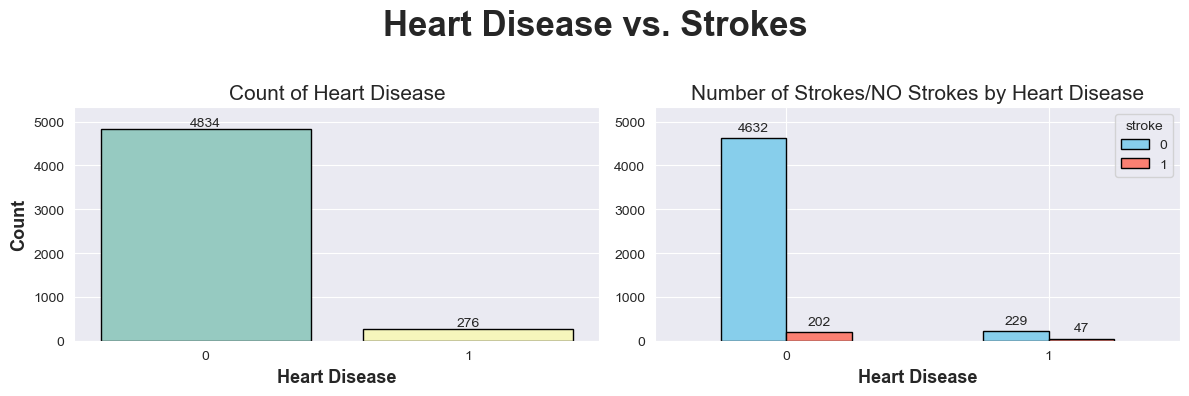

In [16]:
# Visualization of 'heart_disease' in bar plots
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Heart Disease vs. Strokes', fontsize=25, fontweight='bold')

# First subplot: Countplot of heart disease
sns.countplot(x=categorical_features[2], edgecolor='black', palette="Set3", data=df, ax=axes[0])
axes[0].set_title("Count of Heart Disease", fontsize=15)
axes[0].set_xlabel("Heart Disease", fontsize=13, fontweight='bold')
axes[0].set_ylabel("Count", fontsize=13, fontweight='bold')

# Adding counts above each bar for countplot
for container in axes[0].containers:
    axes[0].bar_label(container)

# Second subplot: Bar plot for stroke counts by heart disease
# Group data by heart disease and stroke status, and count occurrences
stroke_counts = df.groupby(['heart_disease', 'stroke']).size().unstack(fill_value=0)

# Bar plot for stroke counts by heart disease on the second subplot
stroke_counts.plot(kind='bar', stacked=False, edgecolor='black', color=['skyblue', 'salmon'], ax=axes[1])
axes[1].set_title("Number of Strokes/NO Strokes by Heart Disease", fontsize=15)
axes[1].set_xlabel("Heart Disease", fontsize=13, fontweight='bold')
axes[1].legend(['0', '1'], title='stroke')

# Change x-axis labels to '0' and '1' with horizontal rotation
axes[1].set_xticklabels(['0', '1'], rotation=0)

# Adding counts above each bar for stroke_counts plot
for container in axes[1].containers:
    axes[1].bar_label(container, label_type='edge', padding=3)

# Synchronize y-axis limits
max_count = max(axes[0].get_ylim()[1] + 250, axes[1].get_ylim()[1] + 250)
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)

# Display the combined plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title

plt.savefig('bar-heartdisease-stroke.png')
plt.show()

**Notes (to Assumption 3):**

* Roughly **95%** of patients do **NOT** have any **heart disease**, and roughly **5%** of patients have **heart disease**.
* Among patients **without heart disease**, roughly **4.4%** of them had a stroke.
* Among patients **with heart disease**, roughly **17%** of them had a stroke.

**Verification (to Assumption 3):** Risk of stroke events in patients with heart disease is **significantly high** (approximately 12% higher), which proves that our assumption is **true**.

<br> <br> <br> <br> <br>

**Assumption 4.** High workload results in high blood pressure and that could lead to stroke: is this true?

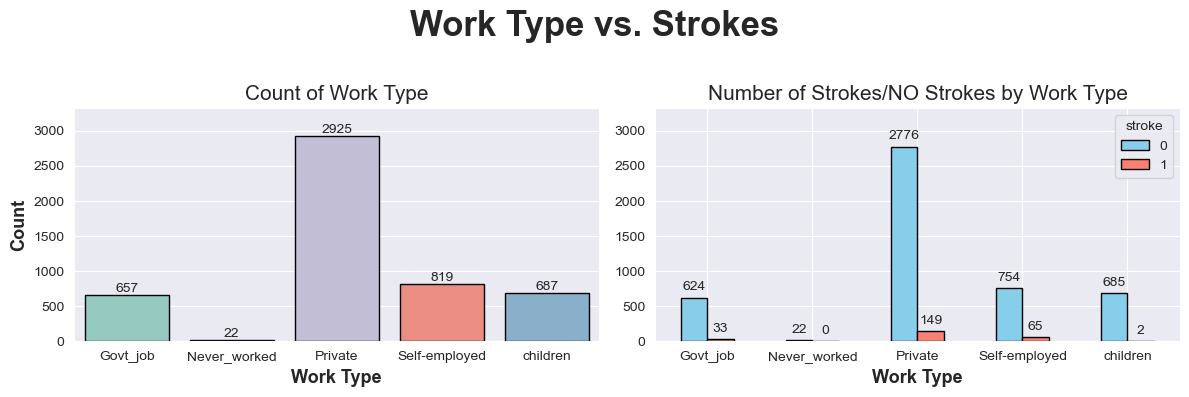

In [17]:
# Visualization of 'work_type' in bar plots
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Work Type vs. Strokes', fontsize=25, fontweight='bold')

# First subplot: Countplot of work type
sns.countplot(x=categorical_features[4], edgecolor='black', palette="Set3", data=df, ax=axes[0], order=['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'])
axes[0].set_title("Count of Work Type", fontsize=15)
axes[0].set_xlabel("Work Type", fontsize=13, fontweight='bold')
axes[0].set_ylabel("Count", fontsize=13, fontweight='bold')

# Adding counts above each bar for countplot
for container in axes[0].containers:
    axes[0].bar_label(container)

# Second subplot: Bar plot for stroke counts by work type
# Group data by work type and stroke status, and count occurrences
stroke_counts = df.groupby(['work_type', 'stroke']).size().unstack(fill_value=0)

# Bar plot for stroke counts by work type on the second subplot
stroke_counts.plot(kind='bar', stacked=False, edgecolor='black', color=['skyblue', 'salmon'], ax=axes[1])
axes[1].set_title("Number of Strokes/NO Strokes by Work Type", fontsize=15)
axes[1].set_xlabel("Work Type", fontsize=13, fontweight='bold')
axes[1].legend(['0', '1'], title='stroke')

# Change x-axis labels to '0' and '1' with horizontal rotation
axes[1].set_xticklabels(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'], rotation=0)

# Adding counts above each bar for stroke_counts plot
for container in axes[1].containers:
    axes[1].bar_label(container, label_type='edge', padding=3)

# Synchronize y-axis limits
max_count = max(axes[0].get_ylim()[1] + 250, axes[1].get_ylim()[1] + 250)
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)

# Display the combined plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title

plt.savefig('bar-worktype-stroke.png')
plt.show()

**Notes (to Assumption 4):** 

* **Most patients** work in the **private** sector.
* Percentages of patients who had a stroke depending on their work_type is as follows:

|  Work Type     | (Rough) Percentage of Patients Who Had a Stroke |
| ----------- | ----------- |
| Govt_job | 5.0% |
| Never_worked | 0% |
| Private | 5.1% |
| **Self-employed** | **7.9%** |
| children | 0.3% |

**Verification (to Assumption 4):** We can see that patients who are self-employed are most likely to have a stroke. On the other hand, most of the stoke events could be seen in privately employed patiennts. This may be due to the different workload and stress caaused by differrent work types. However, more research should be conducted to determine whether our assumption is true.

<br> <br> <br> <br> <br>

**Assumption 5.** Smoking can induce strokes: is this true?

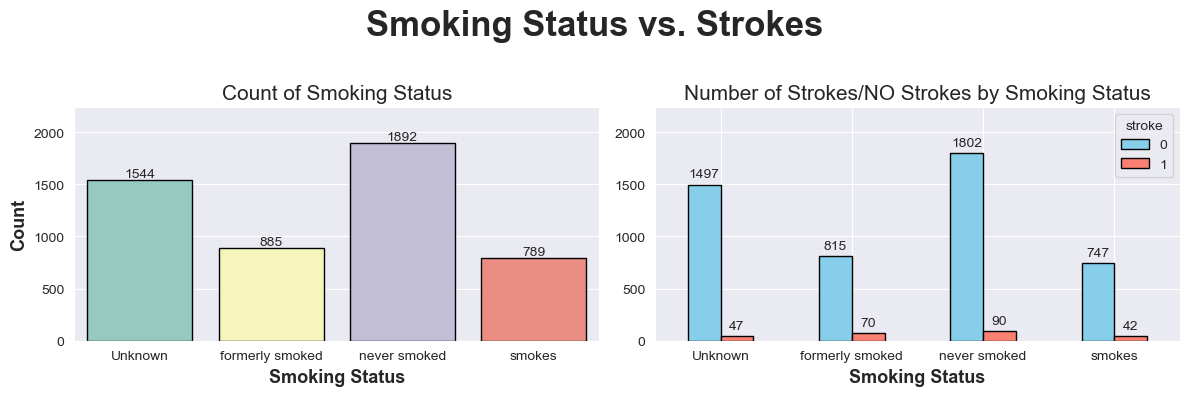

In [18]:
# Visualization of 'smoking_status' in bar plots
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Smoking Status vs. Strokes', fontsize=25, fontweight='bold')

# First subplot: Countplot of smoking status
sns.countplot(x=categorical_features[6], edgecolor='black', palette="Set3", data=df, ax=axes[0], order=['Unknown', 'formerly smoked', 'never smoked', 'smokes'])
axes[0].set_title("Count of Smoking Status", fontsize=15)
axes[0].set_xlabel("Smoking Status", fontsize=13, fontweight='bold')
axes[0].set_ylabel("Count", fontsize=13, fontweight='bold')

# Adding counts above each bar for countplot
for container in axes[0].containers:
    axes[0].bar_label(container)

# Second subplot: Bar plot for stroke counts by smoking status
# Group data by smoking status and stroke status, and count occurrences
stroke_counts = df.groupby(['smoking_status', 'stroke']).size().unstack(fill_value=0)

# Bar plot for stroke counts by smoking status on the second subplot
stroke_counts.plot(kind='bar', stacked=False, edgecolor='black', color=['skyblue', 'salmon'], ax=axes[1])
axes[1].set_title("Number of Strokes/NO Strokes by Smoking Status", fontsize=15)
axes[1].set_xlabel("Smoking Status", fontsize=13, fontweight='bold')
axes[1].legend(['0', '1'], title='stroke')

# Change x-axis labels to '0' and '1' with horizontal rotation
axes[1].set_xticklabels(['Unknown', 'formerly smoked', 'never smoked', 'smokes'], rotation=0)

# Adding counts above each bar for stroke_counts plot
for container in axes[1].containers:
    axes[1].bar_label(container, label_type='edge', padding=3)

# Synchronize y-axis limits
max_count = max(axes[0].get_ylim()[1] + 250, axes[1].get_ylim()[1] + 250)
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)

# Display the combined plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title

plt.savefig('bar-smokingstatus-stroke.png')
plt.show()

**Notes (to Assumption 5):** 

* We do **NOT** have any information about the smoking status for 1544 patients, which accounts to roughly **30%** of patients.
* Percentages of patients who had a stroke depending on their smoking status is as follows:

|  Smoking Type     | (Rough) Percentage of Patients Who Had a Stroke |
| ----------- | ----------- |
| Unknown | 3.0% |
| **Formerly Smoked** | **7.9%** |
| Never Smoked | 4.8% |
| Smokes | 5.3% |

**Verification (to Assumption 5):** By inspection, it seems like smoking does have an effect on strokes. In particular, former smokers are most likely to get strokes, and patients who smoke comes second. Since the percetanges are pretty close, we would require more data to determine if our assumption is true.

<br> <br> <br> <br> <br>

Here are the visualizations of the other 2 features which we did not make any assumptions on:

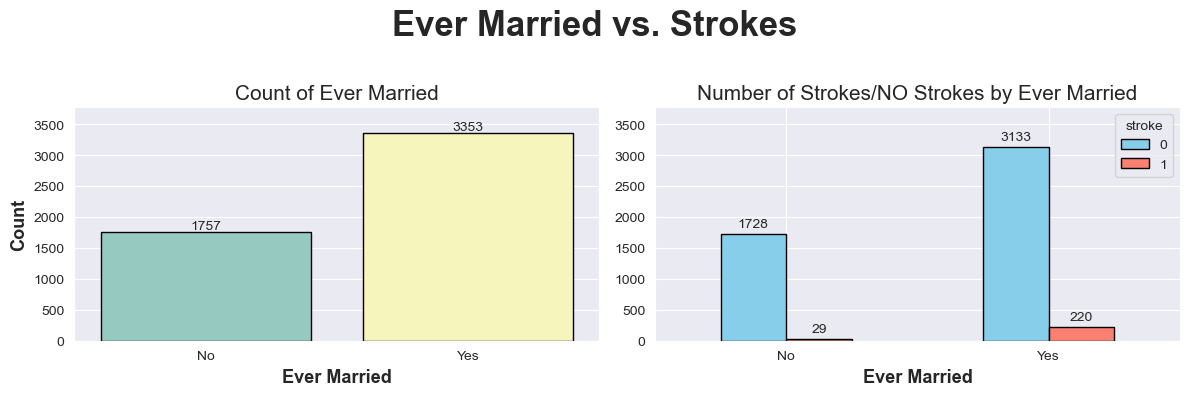

In [19]:
# Visualization of 'ever_married' in bar plots
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Ever Married vs. Strokes', fontsize=25, fontweight='bold')

# First subplot: Countplot of ever_married
sns.countplot(x=categorical_features[3], edgecolor='black', palette="Set3", data=df, ax=axes[0], order=['No', 'Yes'])
axes[0].set_title("Count of Ever Married", fontsize=15)
axes[0].set_xlabel("Ever Married", fontsize=13, fontweight='bold')
axes[0].set_ylabel("Count", fontsize=13, fontweight='bold')

# Adding counts above each bar for countplot
for container in axes[0].containers:
    axes[0].bar_label(container)

# Second subplot: Bar plot for stroke counts by ever_married
# Group data by ever_married and stroke status, and count occurrences
stroke_counts = df.groupby(['ever_married', 'stroke']).size().unstack(fill_value=0)

# Bar plot for stroke counts by ever_married on the second subplot
stroke_counts.plot(kind='bar', stacked=False, edgecolor='black', color=['skyblue', 'salmon'], ax=axes[1])
axes[1].set_title("Number of Strokes/NO Strokes by Ever Married", fontsize=15)
axes[1].set_xlabel("Ever Married", fontsize=13, fontweight='bold')
axes[1].legend(['0', '1'], title='stroke')

# Change x-axis labels to '0' and '1' with horizontal rotation
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)

# Adding counts above each bar for stroke_counts plot
for container in axes[1].containers:
    axes[1].bar_label(container, label_type='edge', padding=3)

# Synchronize y-axis limits
max_count = max(axes[0].get_ylim()[1] + 250, axes[1].get_ylim()[1] + 250)
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)

# Display the combined plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title

plt.savefig('bar-evermarried-stroke.png')
plt.show()

**Notes (to ever_married):**

* Roughly **34.4%** of patients **NEVER** got **married**.
* Among patients who **NEVER** got **married**, roughly **1.7%** of them had a stroke.
* Among patients who got **married**, roughly **6.6%** of them had a stroke.

**Interpretation (to ever_married):** Although the percentage of patients who got married to have a stroke is higher, more research and data are required to conclude that this is in fact true in general.

<br> <br> <br> <br> <br>

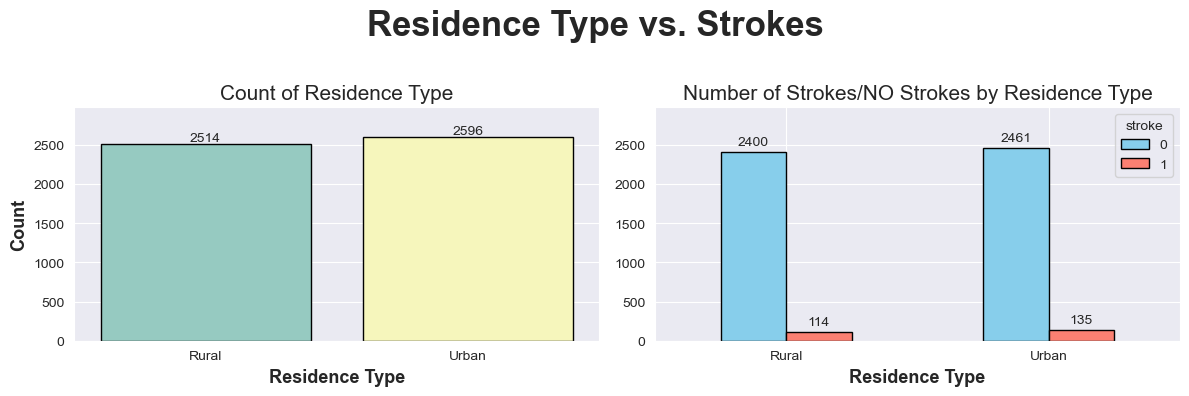

In [20]:
# Visualization of 'Residence_type' in bar plots
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Residence Type vs. Strokes', fontsize=25, fontweight='bold')

# First subplot: Countplot of Residence_type
sns.countplot(x=categorical_features[5], edgecolor='black', palette="Set3", data=df, ax=axes[0], order=['Rural', 'Urban'])
axes[0].set_title("Count of Residence Type", fontsize=15)
axes[0].set_xlabel("Residence Type", fontsize=13, fontweight='bold')
axes[0].set_ylabel("Count", fontsize=13, fontweight='bold')

# Adding counts above each bar for countplot
for container in axes[0].containers:
    axes[0].bar_label(container)

# Second subplot: Bar plot for stroke counts by Residence_type
# Group data by Residence_type and stroke status, and count occurrences
stroke_counts = df.groupby(['Residence_type', 'stroke']).size().unstack(fill_value=0)

# Bar plot for stroke counts by Residence_type on the second subplot
stroke_counts.plot(kind='bar', stacked=False, edgecolor='black', color=['skyblue', 'salmon'], ax=axes[1])
axes[1].set_title("Number of Strokes/NO Strokes by Residence Type", fontsize=15)
axes[1].set_xlabel("Residence Type", fontsize=13, fontweight='bold')
axes[1].legend(['0', '1'], title='stroke')

# Change x-axis labels to '0' and '1' with horizontal rotation
axes[1].set_xticklabels(['Rural', 'Urban'], rotation=0)

# Adding counts above each bar for stroke_counts plot
for container in axes[1].containers:
    axes[1].bar_label(container, label_type='edge', padding=3)

# Synchronize y-axis limits
max_count = max(axes[0].get_ylim()[1] + 250, axes[1].get_ylim()[1] + 250)
axes[0].set_ylim(0, max_count)
axes[1].set_ylim(0, max_count)

# Display the combined plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title

plt.savefig('bar-residencetype-stroke.png')
plt.show()

**Notes (to Residence_Type):**

* There is a balanced split (roughly **50% - 50%**) for the **Residence_type** among patients.
* Among patients who live in a **Rural** area, roughly **4.5%** of them had a stroke.
* Among patients who live in an **Urban** area, roughly **5.22%** of them had a stroke.

**Interpretation (to Residence_Type):** The types of residence does **NOT** seem to affect stroke count much.

<br> <br> <br> <br> <br>

<h3 style = "font-family: Serif; font-size: 30px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> PERCENTAGE OF PATIENTS WHO HAD A STROKE </h3>

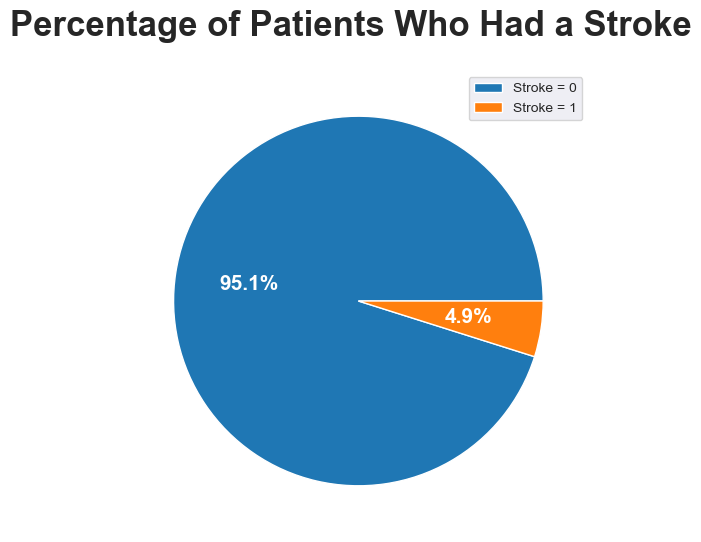

In [21]:
# Visualization of patients with/without strokes in a pie chart
num_stroke = df['stroke'].value_counts()

labels = ['Stroke = 0', 'Stroke = 1']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
fig.suptitle('Percentage of Patients Who Had a Stroke', fontsize=25, fontweight='heavy')

plt.pie(num_stroke, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
plt.legend()

plt.savefig('percentage-patients-stroke.png')
plt.show()

**Observation:** Roughly 95% of patients had a stroke, and roughly 5% did not have a stroke.

**Note:** This proves that we need some sort of undersampling or oversampling since we have an imbalanced dataset. As we will see later, we will apply SMOTE.

<a id = '2.4'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 2.4 LABEL ENCODING </h2>

In [22]:
# Categorical values before conversion
print(f"gender: {pd.unique(df['gender'])}")
print(f"ever_married: {pd.unique(df['ever_married'])}")
print(f"work_type: {pd.unique(df['work_type'])}")
print(f"Residence_type: {pd.unique(df['Residence_type'])}")
print(f"smoking_status: {pd.unique(df['smoking_status'])}")

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [23]:
# Convert categorical features into numeric values
enc = LabelEncoder()

for columns in df.select_dtypes(include=['object']):
    df[columns] = enc.fit_transform(df[[columns]])

# Check if our conversion succeeded
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [24]:
# Categorical values after conversion
print(f"gender: {pd.unique(df['gender'])}")
print(f"ever_married: {pd.unique(df['ever_married'])}")
print(f"work_type: {pd.unique(df['work_type'])}")
print(f"Residence_type: {pd.unique(df['Residence_type'])}")
print(f"smoking_status: {pd.unique(df['smoking_status'])}")

gender: [1 0 2]
ever_married: [1 0]
work_type: [2 3 0 4 1]
Residence_type: [1 0]
smoking_status: [1 2 3 0]


Now, our categorical features look as follows:

* **gender**: 0=female, 1=male, 2=Other
* **ever_married**: 0=No, 1=Yes
* **work_type**: 0=Govt_job, 1=Never_worked, 2=Private, 3=Self-employed, 4=children
* **Residence_type**: 0=Rural, 1=Urban
* **smoking_status**: 0=Unknown, 1=formerly smoked, 2=never smoked, 3=smokes

<a id = '3'></a>

<h2 style = "font-family: Serif; font-size: 50px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 3. MODELLING </h2>

Now, we will use a few machine learning algorithms to fit our dataset. The models we will use are as follows:
* [Logistic Regression](#3.2)
* [SVC](#3.3)
* [K Neighbors Classifier](#3.4)
* [Decision Tree Classifier](#3.5)
* [Random Forest Classifier](#3.6)
* [AdaBoost Classifier](#3.7)
* [Gradient Boosting Classifier](#3.8)
* [XGBoost Classifier](#3.9)

Recall that from [Section 2.3](#2.3), we realized we have an imbalanced dataset. Hence, we will duplicate the data to deal with the potential bias in the predictions. In particular, we will be using synthetic data (SMOTE) for modeling purposes to ensure that the predictions are not skewed towards the majority target class value (stroke=0 in our case). Thus, evaluating models using accuracy will be misleading. Instead, we will focus on **confusion matrix**, **ROC AUC score**, and **classification_report** for model evaluation.

Before fitting our chosen machine learning models, we will define an evaluation function which includes a plot of **confusion matrix**, computation of **ROC AUC score**, and **classification_report**. Recall that we need to split our dataset into training and test sets before applying SMOTE resampling to avoid any potential bias.

<a id = '3.1'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 3.1 INITIALIZATION </h2>

Most of the algorithms we will use assume the data to be normally distributed. Hence, we need to apply **Normalization** where appropriate.

In [25]:
# Set random seed
np.random.seed(42)

# Split the data into X (features) and y (tarrget)
X = df.drop(columns = 'stroke')
y = df['stroke']

# Split our dataset into train & test dataset (we use 75% - 25% here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Instantiate MinMaxScaler
mms = MinMaxScaler()

# Apply normalization to our dataset
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)

# SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# See how our dataset looks like after resampling
print('Shape of Training features: {}'.format(X_resampled.shape))
print('Shape of Training targets: {}'.format(y_resampled.shape))
print('Shape of Testing features: {}'.format(X_test_scaled.shape))
print('Shape of Testing targets: {}'.format(y_test.shape))

Shape of Training features: (7326, 10)
Shape of Training targets: (7326,)
Shape of Testing features: (1278, 10)
Shape of Testing targets: (1278,)


In [26]:
# Define evaluation functions

# Define a function to plot Confusion Matrix
def plot_confusion_matrix(model, y_test, y_pred):
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Blues")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    text = f'{model}'
    match = re.search(r"^[^(]+", text)
    if match:
        text_modified = match.group().strip()
    ax.set_title(f'Confusion Matrix for {text_modified}')
    ax.xaxis.set_ticklabels(['Did Not Have a Stroke', 'Had a Stroke'])
    ax.yaxis.set_ticklabels(['Did Not Have a Stroke', 'Had a Stroke']) 

    # Add text annotations for TN, FP, FN, TP
    labels = [["True Negative", "False Positive"], ["False Negative", "True Positive"]]
    offset = 0.15  # Adjust this value to move the text further up or down
    
    for i in range(2):
        for j in range(2):
            ax.text(j + 0.5, i + 0.42, labels[i][j], color="black", ha="center", va="bottom", fontsize=10, fontweight="bold")

    plt.savefig(f'confusion-matrix-{text_modified}.png')
    plt.show()

# Define a function to compute the roc_auc_score
def compute_roc_auc(model, X_test_scaled, y_test, y_pred):
    y_probs = model.predict_proba(X_test_scaled)
    roc_auc = round(roc_auc_score(y_test, y_probs[:,1]), 3)
    return roc_auc

# Define a function to compute the f1_score
def compute_f1(y_test, y_pred):
    return round(f1_score(y_test, y_pred), 3)

# Define a function to compute the weighed_average_f1_scoree
def compute_weighted_f1(y_test, y_pred):
    return round(f1_score(y_test, y_pred, average='weighted'), 3)

# Define a function to show all relevant metrics
def evaluation(model, X_test_scaled, y_test, y_pred):

    # Plot the confusion matrix
    plot_confusion_matrix(model, y_test, y_pred)

    # Compute the roc_auc_score
    auc = compute_roc_auc(model, X_test_scaled, y_test, y_pred)
    print(f'The AUC ROC Score for {model} is {auc}.')

    # Compute the f1_score
    f1 = compute_f1(y_test, y_pred)
    print(f'The F1 Score for {model} is {f1}.')

    # Compute the weighted_average_f1_score
    weighted_f1 = compute_weighted_f1(y_test, y_pred)
    print(f'The Weighted Average F1 Score for {model} is {weighted_f1}.\n')
    
    # Show the classification report
    cr = classification_report(y_test, y_pred)
    print(cr)

<a id = '3.2'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 3.2 LOGISTIC REGRESSION </h2>

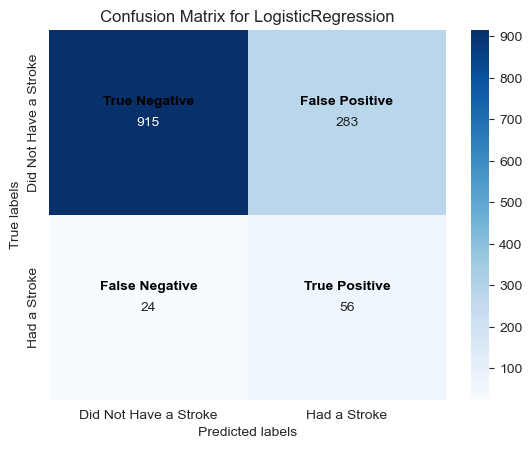

The AUC ROC Score for LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear') is 0.84.
The F1 Score for LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear') is 0.267.
The Weighted Average F1 Score for LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear') is 0.819.

              precision    recall  f1-score   support

           0       0.97      0.76      0.86      1198
           1       0.17      0.70      0.27        80

    accuracy                           0.76      1278
   macro avg       0.57      0.73      0.56      1278
weighted avg       0.92      0.76      0.82      1278

CPU times: total: 7.2 s
Wall time: 7.36 s


In [27]:
%%time
# Apply Logistic Regression

# Set random seed
np.random.seed(42)

# Create a dictionary to define parameters to test in Logistic Regression algorithm
parameters_lr = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

# Instantiate model
lr = LogisticRegression(random_state=42)

# Use GridSearchCV to find the best parameters
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters_lr, cv=10).fit(X_resampled, y_resampled)

# Fit the dataset using the best parameters found using GridSearchCV
lr = LogisticRegression(**lr_cv.best_params_, random_state=42).fit(X_resampled, y_resampled)

# Make predictions on our test set
y_pred_lr = lr.predict(X_test_scaled)

# Save roc_auc_score, f1_score & weighted_average_f1_score as a variable
lr_auc = compute_roc_auc(lr, X_test_scaled, y_test, y_pred_lr)
lr_f1 = compute_f1(y_test, y_pred_lr)
lr_weighted_f1 = compute_weighted_f1(y_test, y_pred_lr)

# Evaluate our model
evaluation(lr, X_test_scaled, y_test, y_pred_lr)

<a id = '3.3'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 3.3 SVC </h2>

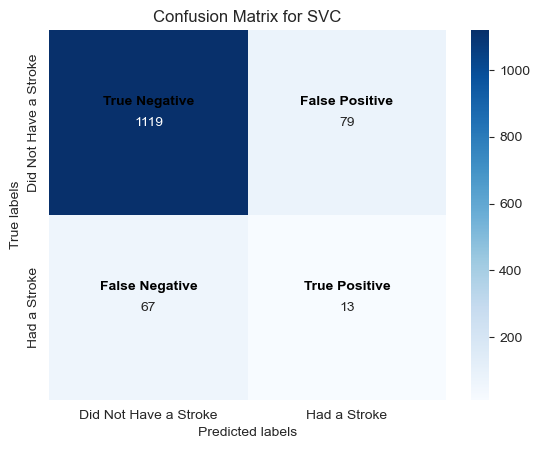

The AUC ROC Score for SVC(C=100, gamma=10, probability=True, random_state=42) is 0.629.
The F1 Score for SVC(C=100, gamma=10, probability=True, random_state=42) is 0.151.
The Weighted Average F1 Score for SVC(C=100, gamma=10, probability=True, random_state=42) is 0.889.

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1198
           1       0.14      0.16      0.15        80

    accuracy                           0.89      1278
   macro avg       0.54      0.55      0.54      1278
weighted avg       0.89      0.89      0.89      1278

CPU times: total: 4min 54s
Wall time: 8min 30s


In [28]:
%%time
# Apply SVC

# Set random seed
np.random.seed(42)

# Create a dictionary to define parameters to test in SVC algorithm
parameters_svc = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}

# Instantiate model
svc = SVC(random_state=42)

# Use GridSearchCV to find the best parameters
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters_svc, cv=5).fit(X_resampled, y_resampled)

# Fit the dataset using the best parameters found using GridSearchCV
svc = SVC(**svc_cv.best_params_, probability = True, random_state=42).fit(X_resampled, y_resampled)

# Make predictions on our test set
y_pred_svc = svc.predict(X_test_scaled)

# Save roc_auc_score, f1_score & weighted_average_f1_score as a variable
svc_auc = compute_roc_auc(svc, X_test_scaled, y_test, y_pred_svc)
svc_f1 = compute_f1(y_test, y_pred_svc)
svc_weighted_f1 = compute_weighted_f1(y_test, y_pred_svc)

# Evaluate our model
evaluation(svc, X_test_scaled, y_test, y_pred_svc)

<a id = '3.4'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 3.4 K NEIGHBORS CLASSIFIER </h2>

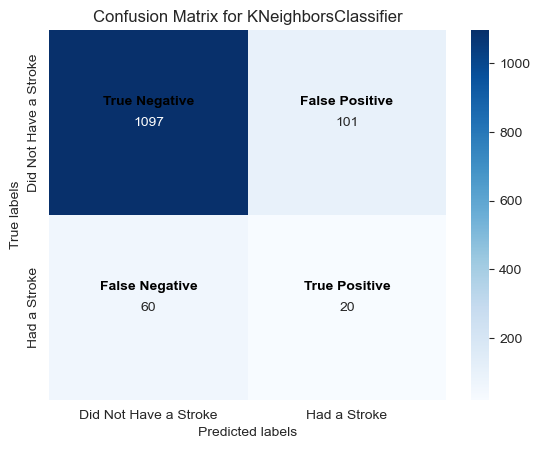

The AUC ROC Score for KNeighborsClassifier(n_neighbors=3, p=1) is 0.632.
The F1 Score for KNeighborsClassifier(n_neighbors=3, p=1) is 0.199.
The Weighted Average F1 Score for KNeighborsClassifier(n_neighbors=3, p=1) is 0.886.

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1198
           1       0.17      0.25      0.20        80

    accuracy                           0.87      1278
   macro avg       0.56      0.58      0.57      1278
weighted avg       0.90      0.87      0.89      1278

CPU times: total: 20.8 s
Wall time: 52.2 s


In [29]:
%%time
# Apply KNeighbors Classifier

# Set random seed
np.random.seed(42)

# Create a dictionary to define parameters to test in KNeighbors algorithm
parameters_knn = {
    'n_neighbors' : list(np.arange(3, 20, 2)),
    'p' : [1, 2, 3, 4]
}

# Instantiate model
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best parameters
knn_cv = GridSearchCV(estimator=knn, param_grid=parameters_knn, cv=5).fit(X_resampled, y_resampled)

# Fit the dataset using the best parameters found using GridSearchCV
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_resampled, y_resampled)

# Make predictions on our test set
y_pred_knn = knn.predict(X_test_scaled)

# Save roc_auc_score, f1_score & weighted_average_f1_score as a variable
knn_auc = compute_roc_auc(knn, X_test_scaled, y_test, y_pred_knn)
knn_f1 = compute_f1(y_test, y_pred_knn)
knn_weighted_f1 = compute_weighted_f1(y_test, y_pred_knn)

# Evaluate our model
evaluation(knn, X_test_scaled, y_test, y_pred_knn)

<a id = '3.5'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 3.5 DECISION TREE CLASSIFIER </h2>

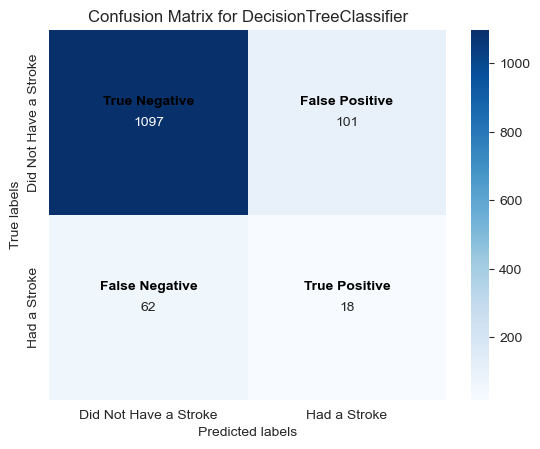

The AUC ROC Score for DecisionTreeClassifier(criterion='entropy', max_depth=17, random_state=42) is 0.569.
The F1 Score for DecisionTreeClassifier(criterion='entropy', max_depth=17, random_state=42) is 0.181.
The Weighted Average F1 Score for DecisionTreeClassifier(criterion='entropy', max_depth=17, random_state=42) is 0.884.

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1198
           1       0.15      0.23      0.18        80

    accuracy                           0.87      1278
   macro avg       0.55      0.57      0.56      1278
weighted avg       0.90      0.87      0.88      1278

CPU times: total: 5.88 s
Wall time: 13.3 s


In [30]:
%%time
# Apply Decision Tree Classifier

# Set random seed
np.random.seed(42)

# Create a dictionary to define parameters to test in Decision Tree algorithm
parameters_tree = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
}

# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters_tree, cv=5).fit(X_resampled, y_resampled)

# Fit the dataset using the best parameters found using GridSearchCV
tree = DecisionTreeClassifier(**tree_cv.best_params_, random_state=42).fit(X_resampled, y_resampled)

# Make predictions on our test set
y_pred_tree = tree.predict(X_test_scaled)

# Save roc_auc_score, f1_score  & weighted_average_f1_score as a variable
tree_auc = compute_roc_auc(tree, X_test_scaled, y_test, y_pred_tree)
tree_f1 = compute_f1(y_test, y_pred_tree)
tree_weighted_f1 = compute_weighted_f1(y_test, y_pred_tree)

# Evaluate our model
evaluation(tree, X_test_scaled, y_test, y_pred_tree)

<a id = '3.6'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 3.6 RANDOM FOREST CLASSIFIER </h2>

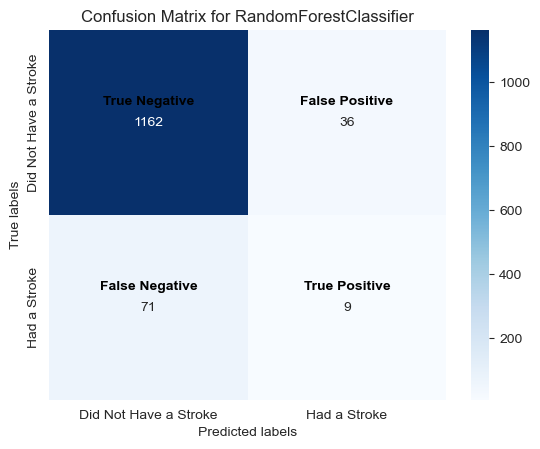

The AUC ROC Score for RandomForestClassifier(n_estimators=500, random_state=42) is 0.791.
The F1 Score for RandomForestClassifier(n_estimators=500, random_state=42) is 0.144.
The Weighted Average F1 Score for RandomForestClassifier(n_estimators=500, random_state=42) is 0.905.

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1198
           1       0.20      0.11      0.14        80

    accuracy                           0.92      1278
   macro avg       0.57      0.54      0.55      1278
weighted avg       0.90      0.92      0.91      1278

CPU times: total: 28.3 s
Wall time: 1min 4s


In [31]:
%%time
# Apply Random Forest Classifier

# Set random seed
np.random.seed(42)

# Create a dictionary to define parameters to test in Random Forest algorithm
parameters_rf = {
    'n_estimators' : [50, 100, 250, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

# Instantiate model
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

# Use GridSearchCV to find the best parameters
rf_cv = GridSearchCV(estimator=rf, param_grid=parameters_rf, cv=5).fit(X_resampled, y_resampled)

# Fit the dataset using the best parameters found using GridSearchCV
rf = RandomForestClassifier(**rf_cv.best_params_, random_state=42).fit(X_resampled, y_resampled)

# Make predictions on our test set
y_pred_rf = rf.predict(X_test_scaled)

# Save roc_auc_score, f1_score & weighted_average_f1_score as a variable
rf_auc = compute_roc_auc(rf, X_test_scaled, y_test, y_pred_rf)
rf_f1 = compute_f1(y_test, y_pred_rf)
rf_weighted_f1 = compute_weighted_f1(y_test, y_pred_rf)

# Evaluate our model
evaluation(rf, X_test_scaled, y_test, y_pred_rf)

<a id = '3.7'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 3.7 ADABOOST CLASSIFIER </h2>

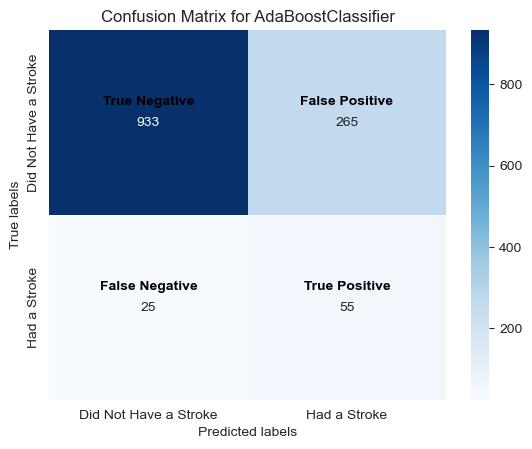

The AUC ROC Score for AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42) is 0.821.
The F1 Score for AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42) is 0.275.
The Weighted Average F1 Score for AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42) is 0.829.

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1198
           1       0.17      0.69      0.28        80

    accuracy                           0.77      1278
   macro avg       0.57      0.73      0.57      1278
weighted avg       0.92      0.77      0.83      1278

CPU times: total: 3.41 s
Wall time: 6.63 s


In [32]:
%%time
# Apply AdaBoost Classifier

# Set random seed
np.random.seed(42)

# Create a dictionary to define parameters to test in AdaBoost algorithm
parameters_ada = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10]
}

# Instantiate model
ada = AdaBoostClassifier((DecisionTreeClassifier(random_state=42)))

# Use GridSearchCV to find the best parameters
ada_cv = GridSearchCV(estimator=ada, param_grid=parameters_ada, cv=5).fit(X_resampled, y_resampled)

# Fit the dataset using the best parameters found using GridSearchCV
ada = AdaBoostClassifier(**ada_cv.best_params_, random_state=42).fit(X_resampled, y_resampled)

# Make predictions on our test set
y_pred_ada = ada.predict(X_test_scaled)

# Save roc_auc_score, f1_score & weighted_average_f1_score as a variable
ada_auc = compute_roc_auc(ada, X_test_scaled, y_test, y_pred_ada)
ada_f1 = compute_f1(y_test, y_pred_ada)
ada_weighted_f1 = compute_weighted_f1(y_test, y_pred_ada)

# Evaluate our model
evaluation(ada, X_test_scaled, y_test, y_pred_ada)

<a id = '3.8'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 3.8 GRADIENT BOOSTING CLASSIFIER </h2>

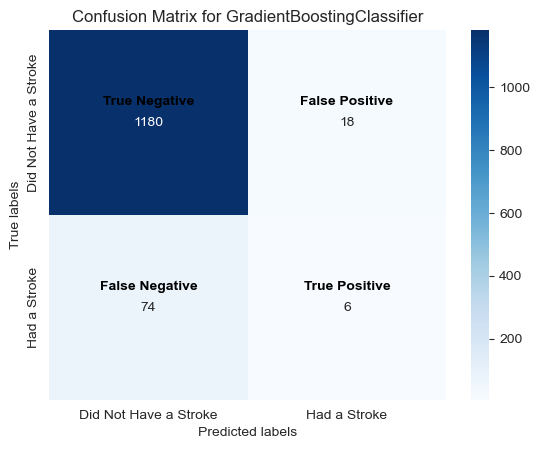

The AUC ROC Score for GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=200,
                           random_state=42) is 0.765.
The F1 Score for GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=200,
                           random_state=42) is 0.115.
The Weighted Average F1 Score for GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=200,
                           random_state=42) is 0.909.

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1198
           1       0.25      0.07      0.12        80

    accuracy                           0.93      1278
   macro avg       0.60      0.53      0.54      1278
weighted avg       0.90      0.93      0.91      1278

CPU times: total: 2min 8s
Wall time: 4min 10s


In [33]:
%%time
# Apply Gradient Boosting Classifier

# Set random seed
np.random.seed(42)

# Create a dictionary to define parameters to test in Gradient Boosting algorithm
parameters_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Instantiate model
gb = GradientBoostingClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
gb_cv = GridSearchCV(estimator=gb, param_grid=parameters_gb, cv=5).fit(X_resampled, y_resampled)

# Fit the dataset using the best parameters found using GridSearchCV
gb = GradientBoostingClassifier(**gb_cv.best_params_, random_state=42).fit(X_resampled, y_resampled)

# Make predictions on our test set
y_pred_gb = gb.predict(X_test_scaled)

# Save roc_auc_score, f1_score & weighted_average_f1_score as a variable
gb_auc = compute_roc_auc(gb, X_test_scaled, y_test, y_pred_gb)
gb_f1 = compute_f1(y_test, y_pred_gb)
gb_weighted_f1 = compute_weighted_f1(y_test, y_pred_gb)

# Evaluate our model
evaluation(gb, X_test_scaled, y_test, y_pred_gb)

<a id = '3.9'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 3.9 XGBOOST CLASSIFIER </h2>

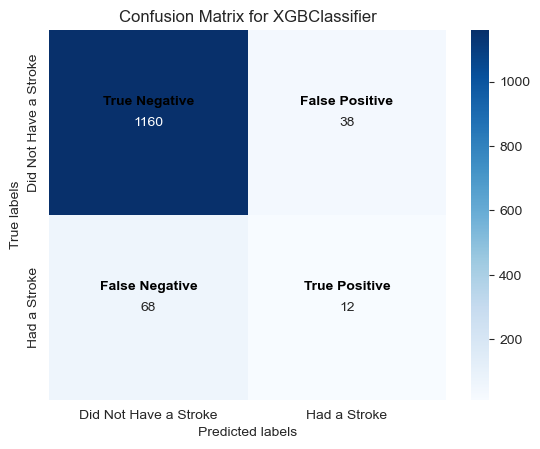

The AUC ROC Score for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) is 0.79.
The F1 Score for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
     

In [34]:
%%time
# Apply XGBoost Classifier

# Set random seed
np.random.seed(42)

# Create a dictionary to define parameters to test in XGBoost algorithm
parameters_xgb = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

# Instantiate model
xgb = XGBClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
xgb_cv = GridSearchCV(estimator=xgb, param_grid=parameters_xgb, cv=2).fit(X_resampled, y_resampled)

# Fit the dataset using the best parameters found using GridSearchCV
xgb = XGBClassifier(**xgb_cv.best_params_, random_state=42).fit(X_resampled, y_resampled)

# Make predictions on our test set
y_pred_xgb = xgb.predict(X_test_scaled)

# Save roc_auc_score, f1_score & weighted_average_f1_score as a variable
xgb_auc = compute_roc_auc(xgb, X_test_scaled, y_test, y_pred_xgb)
xgb_f1 = compute_f1(y_test, y_pred_xgb)
xgb_weighted_f1 = compute_weighted_f1(y_test, y_pred_xgb)

# Evaluate our model
evaluation(xgb, X_test_scaled, y_test, y_pred_xgb)

<a id = '4'></a>

<h2 style = "font-family: Serif; font-size: 50px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 4. CONCLUSION </h2>

Now that we have tried all our chosen models, let us compare the results and decide which models work the best. In our case, since we started with an imbalanced dataset, we will focus on comparing evaluation metrics such as the **confusion matrix**, **ROC AUC Score**, **F1 Score**, and **Weighted Average F1 Score**.

**Recall what these metrics mean:** 
1. **ROC AUC Score** evaluates the models' abilities to distinguish between classes independently of class distribution. It ranges from 0 to 1. Here’s how to interpret it:

* **ROC AUC Score = 0.5:** Indicates random performance (no discrimination between classes).
* **ROC AUC Score > 0.5:** Indicates increasingly better discrimination, with 1 representing perfect classification.

2. **F1 Score** is a measure of a classifier’s accuracy in a binary setting, balancing precision and recall. Here’s how to interpret it:

* **Precision:** Tells us how many of the predicted positive samples are real positives. It is calculated as:

$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}.$$

* **Recall:** Indicates how many of the true positives are captured by the model. It is calculated as:

$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}.$$

* **F1 Score:** Harmonic mean of precision and recall (balances them), with values **closer to 1** representing **better** model performance. It's calculated as:

$$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

3. **Weighted Average F1 Score:** Helps account for imbalance in the class distribution. It is calculated by taking the F1 score for each class and weighting it by the number of true instances for that class in the dataset. The method of interpretation is the same as **F1 Score**.

<a id = '4.1'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 4.1 COMPARING MODELS </h2>

In [35]:
# Create a results dictionary to compare model scores
results = pd.DataFrame({
    'Models': ['Logistic Regression', 'SVC', 'KNeighbors Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'XGBoost Classifier'],
    'ROC AUC Score': [lr_auc, svc_auc, knn_auc, tree_auc, rf_auc, ada_auc, gb_auc, xgb_auc],
    'F1 Score (stroke = 1)': [lr_f1, svc_f1, knn_f1, tree_f1, rf_f1, ada_f1, gb_f1, xgb_f1],
    'Weighted Average F1 Score': [lr_weighted_f1, svc_weighted_f1, knn_weighted_f1, tree_weighted_f1, rf_weighted_f1, ada_weighted_f1, gb_weighted_f1, xgb_weighted_f1]
})

In [36]:
# Look at our results
results

,Models,ROC AUC Score,F1 Score (stroke = 1),Weighted Average F1 Score
0,Logistic Regression,0.840,0.267,0.819
1,SVC,0.629,0.151,0.889
2,KNeighbors Classifier,0.632,0.199,0.886
3,Decision Tree Classifier,0.569,0.181,0.884
4,Random Forest Classifier,0.791,0.144,0.905
5,AdaBoost Classifier,0.821,0.275,0.829
6,Gradient Boosting Classifier,0.765,0.115,0.909
7,XGBoost Classifier,0.790,0.185,0.908


In [37]:
# Sort our results by ROC AUC Score
sorted_results_auc = results.sort_values(by='ROC AUC Score', ascending=False)
sorted_results_auc

,Models,ROC AUC Score,F1 Score (stroke = 1),Weighted Average F1 Score
0,Logistic Regression,0.840,0.267,0.819
5,AdaBoost Classifier,0.821,0.275,0.829
4,Random Forest Classifier,0.791,0.144,0.905
7,XGBoost Classifier,0.790,0.185,0.908
6,Gradient Boosting Classifier,0.765,0.115,0.909
2,KNeighbors Classifier,0.632,0.199,0.886
1,SVC,0.629,0.151,0.889
3,Decision Tree Classifier,0.569,0.181,0.884


In [38]:
# Sort our results by F1 Score (stroke = 1)
sorted_results_f1 = results.sort_values(by='F1 Score (stroke = 1)', ascending=False)
sorted_results_f1

,Models,ROC AUC Score,F1 Score (stroke = 1),Weighted Average F1 Score
5,AdaBoost Classifier,0.821,0.275,0.829
0,Logistic Regression,0.840,0.267,0.819
2,KNeighbors Classifier,0.632,0.199,0.886
7,XGBoost Classifier,0.790,0.185,0.908
3,Decision Tree Classifier,0.569,0.181,0.884
1,SVC,0.629,0.151,0.889
4,Random Forest Classifier,0.791,0.144,0.905
6,Gradient Boosting Classifier,0.765,0.115,0.909


In [39]:
# Sort our results by Weighted Average F1 Score
sorted_results_weighted_f1 = results.sort_values(by='Weighted Average F1 Score', ascending=False)
sorted_results_weighted_f1

,Models,ROC AUC Score,F1 Score (stroke = 1),Weighted Average F1 Score
6,Gradient Boosting Classifier,0.765,0.115,0.909
7,XGBoost Classifier,0.790,0.185,0.908
4,Random Forest Classifier,0.791,0.144,0.905
1,SVC,0.629,0.151,0.889
2,KNeighbors Classifier,0.632,0.199,0.886
3,Decision Tree Classifier,0.569,0.181,0.884
5,AdaBoost Classifier,0.821,0.275,0.829
0,Logistic Regression,0.840,0.267,0.819


In [40]:
# Create a results dictionary to compare top 4 model scores
final = pd.DataFrame({
    'Top 4 by ROC AUC Score': ['Logistic Regression', 'AdaBoost Classifier', 'Random Forest Classifier'],
    'Top 4 by F1 Score (stroke = 1)': ['AdaBoost Classifier', 'Logistic Regression', 'KNeighbors Classifier'],
    'Top 4 by Weighted Average F1 Score': ['Gradient Boosting Classifier', 'XGBoost Classifier', 'Random Forest Classifier'],
})

In [41]:
# Look at our final (top 4) results
final

,Top 4 by ROC AUC Score,Top 4 by F1 Score (stroke = 1),Top 4 by Weighted Average F1 Score
0,Logistic Regression,AdaBoost Classifier,Gradient Boosting Classifier
1,AdaBoost Classifier,Logistic Regression,XGBoost Classifier
2,Random Forest Classifier,KNeighbors Classifier,Random Forest Classifier


Finally, note that we are focusing on **medical diagnosis** in this project. This means that we need to **reduce** as many **False Negatives** as possible. According to the formulas, this directly implies that we need to prioritize **F1 Score (stroke = 1)**, i.e. choose the models that achieved the **highest F1 Score (stroke = 1)**. Therefore, the top two models we will choose are **AdaBoost Classifier** and **Logistic Regression**.

<a id = '4.2'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 4.2 SUMMARY </h2>

To visualize the relationships between various habits/factors and strokes, and predicting stroke events with the best model and hyper-tuned parameters, we did the following steps:

1. Imported relevant libraries and cleaned the data.
2. Created useful visualizations to answer our [questions & assumptions](#Questions).
3. Normalized the dataset and applied SMOTE to the imbalanced dataset to generate synthetic samples for the minority class (stroke = 1).
4. Implemented and evaluated a few machine learning models using appropriate metrics.
5. Chose the top two models: **AdaBoost Classifier** & **Logistic Regression**. Here's how they did:

In [43]:
# Top 2 models' summary
top2 = pd.DataFrame({
    'Top 2 Models': ['AdaBoost Classifier', 'Logistic Regression'],
    'F1 Score (stroke = 1)': [ada_f1, lr_f1],
    'Weighted Average F1 Score': [ada_weighted_f1, lr_weighted_f1],
    'ROC AUC Score': [ada_auc, lr_auc],
    'CPU Times': ['3.41 s', '7.20 s'],
    'Wall Time': ['6.63 s', '7.36 s']
})

top2

,Top 2 Models,F1 Score (stroke = 1),Weighted Average F1 Score,ROC AUC Score,CPU Times,Wall Time
0,AdaBoost Classifier,0.275,0.829,0.821,3.41 s,6.63 s
1,Logistic Regression,0.267,0.819,0.840,7.20 s,7.36 s


**What can we do further?**

To create predictive models with higher accuracy and better performance, we could continue doing hyperparameter tuning or try other models.